In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


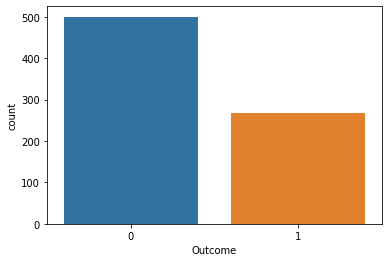

In [ ]:
sns.countplot(x='Outcome',data=dataset)

In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


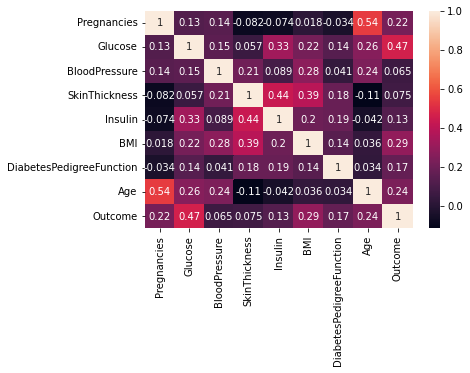

In [ ]:
#Correlation matrix to show correlation between two variables, 0.x means x% similar
corr_mat=dataset.corr()
sns.heatmap(corr_mat, annot=True)

In [ ]:
dataset.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
x=dataset.iloc[:,:-1].values  #Independent matrix
y=dataset.iloc[:,-1].values

In [ ]:
x.shape

(768, 8)

In [ ]:
x[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose')

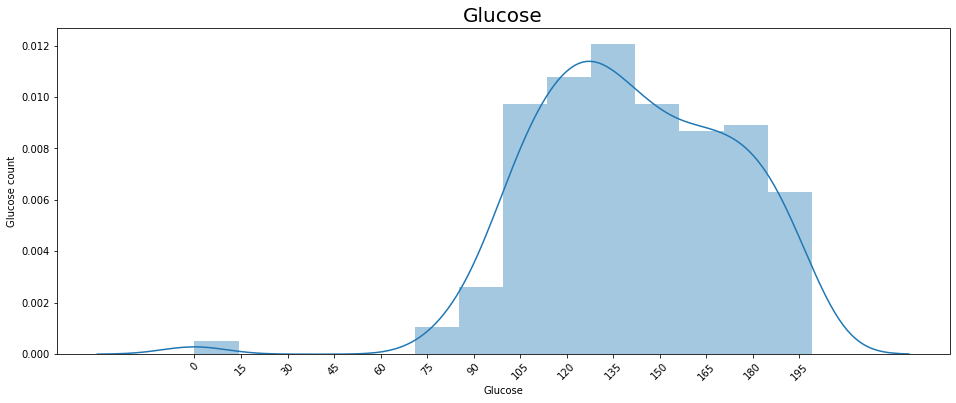

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["Glucose"][dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

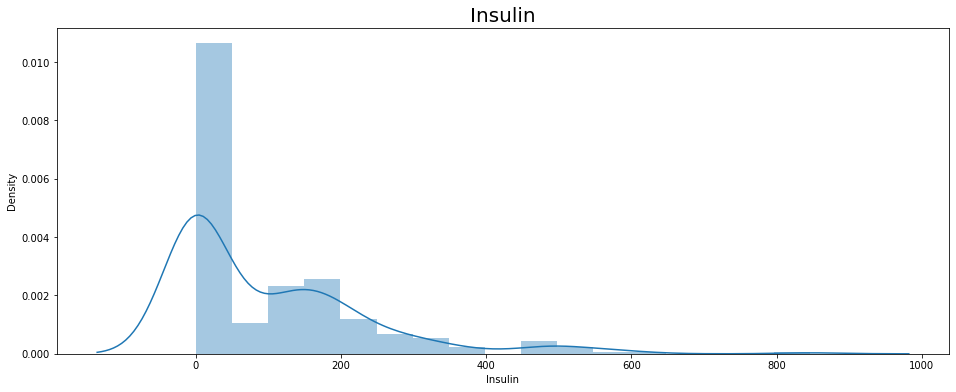

In [ ]:
fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

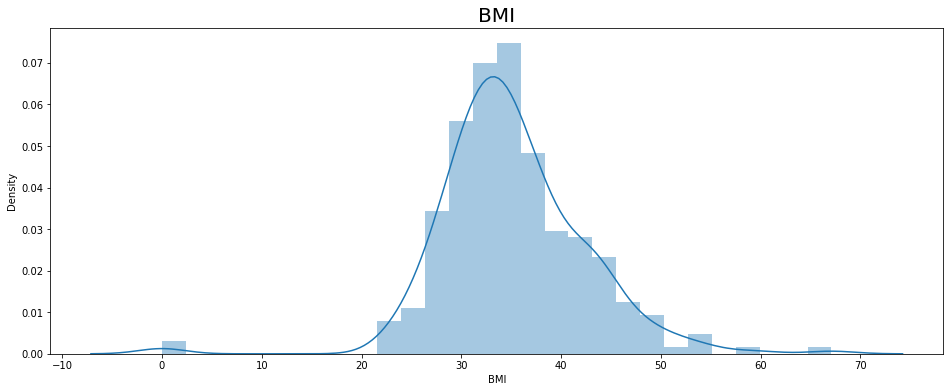

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.distplot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'diabetespedigreefunction')

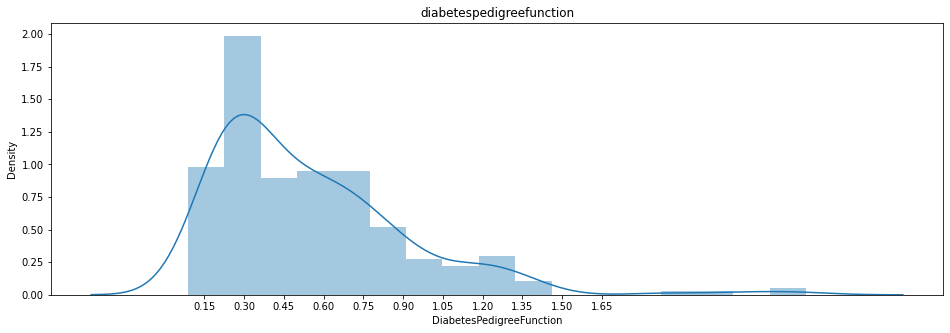

In [ ]:
fig = plt.figure(figsize = (16,5))
sns.distplot(dataset["DiabetesPedigreeFunction"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

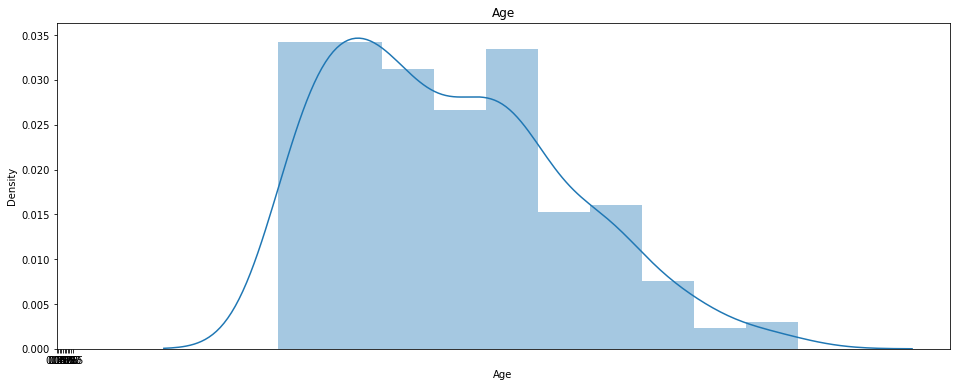

In [ ]:
fig = plt.figure(figsize = (16,6))

sns.distplot(dataset["Age"][dataset["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

In [ ]:
x = dataset.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y = dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x.shape

(768, 5)

In [ ]:
x_train.shape

(614, 5)

In [ ]:
x_test.shape

(154, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_test)


[[ 2.45735903e+00 -6.99656737e-01  1.35224513e+00  2.78594417e+00
  -9.65691892e-01]
 [-4.37196330e-01  1.52162022e-01  1.76195335e-01 -1.87638099e-01
  -8.82402831e-01]
 [-1.41253563e+00 -6.99656737e-01  2.26778122e-01 -2.26685139e-01
  -7.15824710e-01]
 [ 1.41909460e+00  7.91026091e-01 -8.10169011e-01  3.62024077e-01
   1.44969086e+00]
 [-3.11346097e-01 -6.99656737e-01 -9.61917372e-01  5.81288224e-01
  -2.16090348e-01]
 [-1.25522284e+00 -3.58929234e-01 -7.09003437e-01 -5.51075932e-01
  -7.99113771e-01]
 [ 9.78618790e-01  7.56953341e-01  2.52069515e-01  1.28113132e+00
  -4.95122265e-02]
 [ 1.73372019e+00  6.29180527e-01  1.38258245e-01  2.06507574e+00
   1.53297992e+00]
 [ 1.92054834e-01  1.64284485e+00 -5.69900773e-01  3.40468957e+00
  -7.15824710e-01]
 [-5.63046563e-01  9.18798905e-01  6.94668901e-01 -4.27927575e-01
   1.78284710e+00]
 [ 1.16739414e+00  1.38729922e+00 -7.67185999e-02  1.15497935e+00
  -4.65957529e-01]
 [ 2.07980833e+00  1.06360809e+00  1.44076501e+00  1.70464153e+00

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
knn_y_pred = knn.predict(x_test)

In [ ]:
knn_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

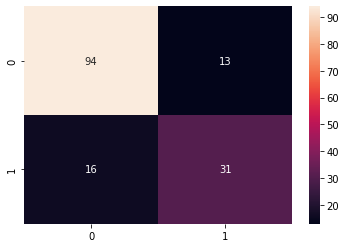

In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [ ]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))
print("Accuracy:",sum(knn_y_pred ==y_test)/len(knn_y_pred))

Correct: 125
Incorrect :  29
Accuracy: 0.8116883116883117


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.8116883116883117

In [ ]:
import pickle
pickle.dump(knn,open('classifier.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))